## Building the Linear Regression Prediction Model

In [36]:
# import cleaned and pre-processed dataset
import pandas as pd

data = pd.read_csv('itineraries cleaned4.csv')

In [37]:
# import packages required to build the model (NumPy, MatPlotLib and Scikit Learn libraries)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

cats=['flightArrivalTime', 'Day of Week', 'segmentsAirlineName', 'isRefundable', 'isNonStop', 'flightDepartureTime', 'destinationAirport', 'segmentsCabinCode']
ohe = OneHotEncoder(drop='first', sparse_output=False)
to_dummies = ColumnTransformer(transformers=[('cats', ohe, cats)],
                               remainder='passthrough')

# encode categorical variables into dummy variables
steps = [
    ('dummy', to_dummies),
    ('LinearRegression', LinearRegression())
]
pipe = Pipeline(steps)

# train the data
y_train = data['totalFare']
x_train = data[['destinationAirport', 'isRefundable', 'isNonStop', 'seatsRemaining', 'totalTravelDistance', 'segmentsAirlineName', 'segmentsCabinCode', 'flightArrivalTime', 'Day of Week', 'daysLeft', 'flightDepartureTime']]
cv = ShuffleSplit(n_splits=10, random_state=0)
scores = cross_val_score(pipe, x_train, y_train, cv=cv, n_jobs=-1)
model = pipe


In [38]:
scores

array([0.57484212, 0.58997613, 0.64930809, 0.55093565, 0.46337841,
       0.63131903, 0.62142954, 0.63717163, 0.6143203 , 0.55562581])

In [39]:
scores.mean()

0.5888306708165107

## Evaluating the Prediction Model based on 10-fold cross-validation

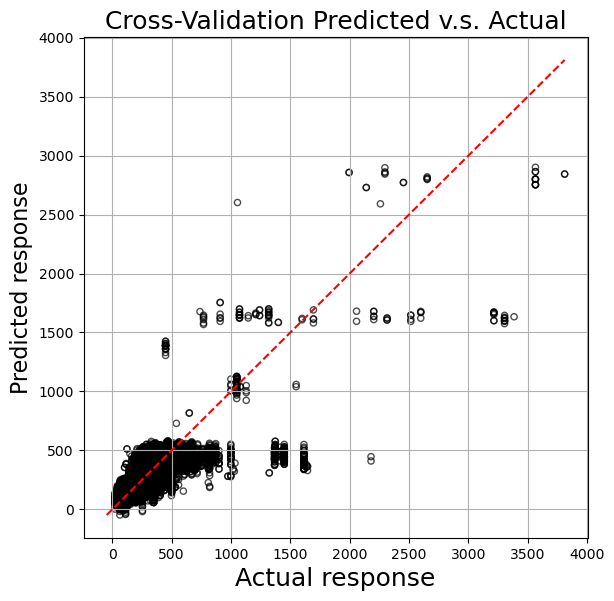

In [40]:
# plot the graph of cross-validation values against actual prediction values
yhat_cv = cross_val_predict(model, x_train, y_train)
fig = plt.figure(figsize=(6.5, 6.5))
plt.scatter(y_train, yhat_cv, s=20, 
            facecolor='none', edgecolor='k', alpha=0.7)
value_max = np.maximum(y_train.max(), yhat_cv.max())
value_min = np.minimum(y_train.min(), yhat_cv.min())
plt.plot([value_min, value_max], [value_min, value_max],
         color='r', linestyle='--')
plt.xlabel('Actual response', fontsize=18)
plt.ylabel('Predicted response', fontsize=16)
plt.title('Cross-Validation Predicted v.s. Actual', fontsize=18)
plt.grid()
plt.show()

## Feature importance of variables

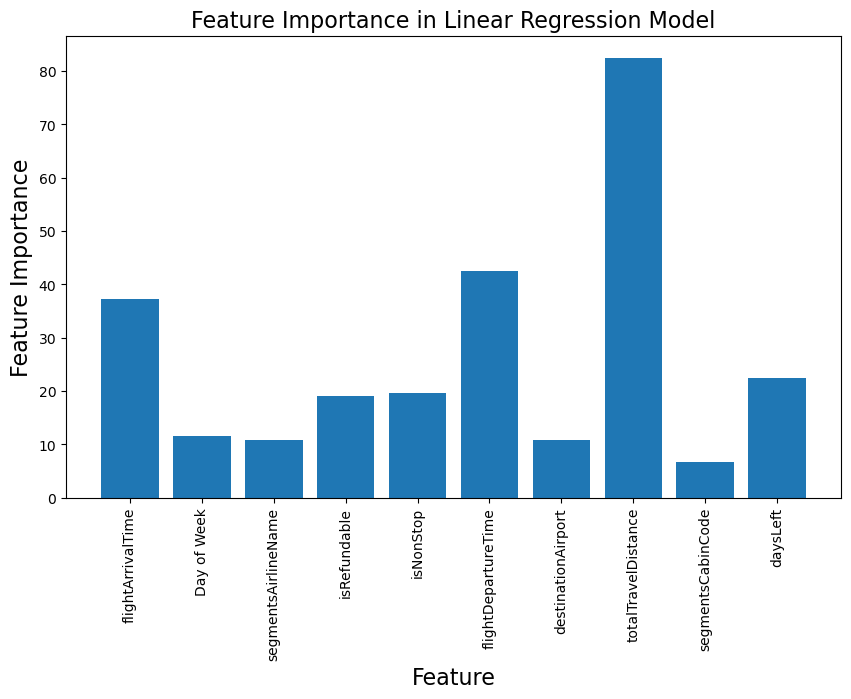

In [47]:
# import packages required 
import numpy as np
import matplotlib.pyplot as plt
import squarify
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

cats=['flightArrivalTime', 'Day of Week', 'segmentsAirlineName', 'isRefundable', 'isNonStop', 'flightDepartureTime', 'destinationAirport', 'totalTravelDistance', 'segmentsCabinCode', 'daysLeft']
ohe = OneHotEncoder(drop='first', sparse_output=False)
to_dummies = ColumnTransformer(transformers=[('cats', ohe, cats)],
                               remainder='passthrough')

steps = [
    ('dummy', to_dummies),
    ('LinearRegression', LinearRegression())
]
pipe = Pipeline(steps)

y_train = data['totalFare']
x_train = data[['destinationAirport', 'isRefundable', 'isNonStop', 'seatsRemaining', 'totalTravelDistance', 'segmentsAirlineName', 'segmentsCabinCode', 'flightArrivalTime', 'Day of Week', 'daysLeft', 'flightDepartureTime']]
cv = ShuffleSplit(n_splits=10, random_state=0)
scores = cross_val_score(pipe, x_train, y_train, cv=cv, n_jobs=-1)
model = pipe.fit(x_train, y_train)

# get feature importances
feature_importance = np.abs(model.named_steps['LinearRegression'].coef_)

# filter feature importance and cats list
filtered_importance = [imp for imp, cat in zip(feature_importance, cats) if cat in x_train.columns]
filtered_cats = [cat for cat in cats if cat in x_train.columns]

# plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(filtered_importance)), filtered_importance)
plt.xticks(np.arange(len(filtered_importance)), filtered_cats, rotation=90)
plt.xlabel('Feature', fontsize = 16)
plt.ylabel('Feature Importance', fontsize = 16)
plt.title('Feature Importance in Linear Regression Model', fontsize = 16)
plt.show()


## Violin plot of 10-fold cross-validation scores

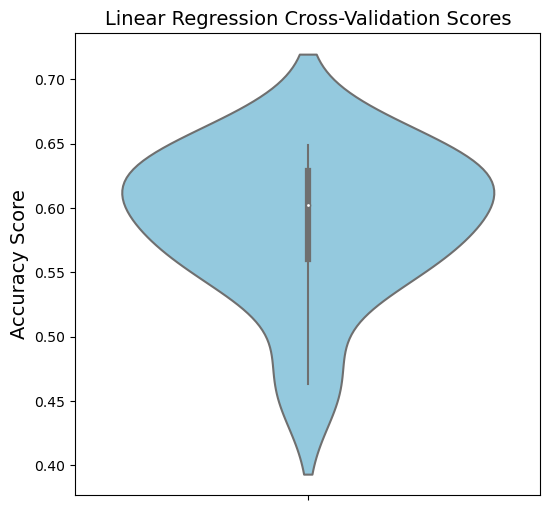

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# cross-validation scores obtained previously
scores = [0.57484212, 0.58997613, 0.64930809, 0.55093565, 0.46337841,
       0.63131903, 0.62142954, 0.63717163, 0.6143203 , 0.55562581]

# create a dataframe for the scores
import pandas as pd
df = pd.DataFrame({'Scores': scores})

# create a violin plot
plt.figure(figsize=(6, 6))
sns.violinplot(y='Scores', data=df, color='skyblue')
plt.title('Linear Regression Cross-Validation Scores', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.show()
